In [ ]:
!pip install transformers datasets torch

In [ ]:
from transformers import pipeline
from datasets import load_dataset

In [ ]:
# Load the Marathi question answering model
qa_pipeline = pipeline(
    "question-answering",
    model="l3cube-pune/marathi-question-answering-squad-bert",
    tokenizer="l3cube-pune/marathi-question-answering-squad-bert"
)

In [ ]:
# Load the Marathi ORCA dataset
dataset = load_dataset("amitagh/marathi-orca-v05")

# Iterate through the dataset and perform question answering for first 10 rows
for i in range(10):
  example=dataset['train'][i]
  context = example["mar_response"]
  question = example["mar_question"]

    # Perform question answering
  result = qa_pipeline(question=question, context=context)

  print('Example:',i+1)
  print("Question:", question)
  print("Context:", context)
  print("Answer:", result["answer"])
  print("----------------")

Example: 1
Question: या सर्व डेटाचे वर्णन करणारे अंदाजे पंधरा शब्दांचे वाक्य तयार करा: मिडसमर हाऊस eatType restaurant; मिडसमर हाउस फूड चायनीज; मिडसमर हाऊस किंमत श्रेणी मध्यम; मिडसमर हाऊस ग्राहक रेटिंग 5 पैकी 3; ऑल बार वन जवळ मिडसमर हाऊस
Context: मिडसमर हाऊस हे 3/5 ग्राहक रेटिंग असलेले माफक किमतीचे चीनी रेस्टॉरंट आहे, जे ऑल बार वन जवळ आहे.
Answer: 3/5
----------------
Example: 2
Question: या परिच्छेदात पुढे काय होते?

मग ती कापसाच्या बॉलवर सुई घासते आणि मग ती पेन्सिलवर ढकलते आणि त्याभोवती धागा गुंडाळते. ती नंतर उत्पादनाचा एक बॉक्स धरते आणि नंतर एका वाडग्यात अनेक द्रव ओतते. ती
तुमचे उत्तर यामधून निवडा: A. सॉसपॅन जोडते आणि ग्राइंडरमध्ये उत्पादन हलवते. बी. सिगारेट स्टाईल करण्यासाठी धागा चिमटा काढतो आणि मग निघून जातो. C. नंतर सुईला शाईत बुडवतो आणि पेन्सिलचा वापर करून तिच्या पायावर डिझाईन काढतो, शेवटी चिंधीने घासतो. डी. तिचे केस स्टाईल करण्यास सुरुवात करते आणि तिने तयार केलेली हेअरस्टाईल दर्शविण्यासाठी केसांचे टोक वेगळे करण्यापूर्वी ते अनेक वेळा कापते.
Context: C. नंतर ती सुई शाईत बुडवते आणि

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu_score(reference, candidate):
    """
    Calculates BLEU score for a candidate sentence against a reference sentence.

    Args:
        reference (str): The reference sentence.
        candidate (str): The candidate sentence to be evaluated.

    Returns:
        float: The BLEU score of the candidate sentence.
    """
    # Split sentences into tokens (words)
    reference_tokens = reference.split()
    candidate_tokens = candidate.split()

    # Calculate BLEU score using NLTK's sentence_bleu function
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=SmoothingFunction().method4)

    return bleu_score



In [ ]:
other_qa_pipeline = pipeline(
    "question-answering",
    model="l3cube-pune/marathi-question-answering-squad-bert",
    tokenizer="l3cube-pune/marathi-question-answering-squad-bert"
)

# Iterate through the dataset
for i in range(10):
  example = dataset['train'][i]
  context = example["mar_response"]
  question = example["mar_question"]

  # Perform question answering with both models
  result1 = qa_pipeline(question=question, context=context)
  answer1 = result1["answer"]

  result2 = other_qa_pipeline(question=question, context=context)
  answer2 = result2["answer"]

  # Calculate BLEU score for each answer against the reference question
  bleu_score1 = calculate_bleu_score(question, answer1)
  bleu_score2 = calculate_bleu_score(question, answer2)

  print('Example:', i + 1)
  print("Question:", question)
  print("Context:", context)
  print("Answer (Model 1):", answer1)
  print("BLEU Score (Model 1):", bleu_score1)
  print("Answer (Model 2):", answer2)
  print("BLEU Score (Model 2):", bleu_score2)
  print("----------------")


Example: 1
Question: या सर्व डेटाचे वर्णन करणारे अंदाजे पंधरा शब्दांचे वाक्य तयार करा: मिडसमर हाऊस eatType restaurant; मिडसमर हाउस फूड चायनीज; मिडसमर हाऊस किंमत श्रेणी मध्यम; मिडसमर हाऊस ग्राहक रेटिंग 5 पैकी 3; ऑल बार वन जवळ मिडसमर हाऊस
Context: मिडसमर हाऊस हे 3/5 ग्राहक रेटिंग असलेले माफक किमतीचे चीनी रेस्टॉरंट आहे, जे ऑल बार वन जवळ आहे.
Answer (Model 1): 3/5
BLEU Score (Model 1): 0
Answer (Model 2): 3/5
BLEU Score (Model 2): 0
----------------
Example: 2
Question: या परिच्छेदात पुढे काय होते?

मग ती कापसाच्या बॉलवर सुई घासते आणि मग ती पेन्सिलवर ढकलते आणि त्याभोवती धागा गुंडाळते. ती नंतर उत्पादनाचा एक बॉक्स धरते आणि नंतर एका वाडग्यात अनेक द्रव ओतते. ती
तुमचे उत्तर यामधून निवडा: A. सॉसपॅन जोडते आणि ग्राइंडरमध्ये उत्पादन हलवते. बी. सिगारेट स्टाईल करण्यासाठी धागा चिमटा काढतो आणि मग निघून जातो. C. नंतर सुईला शाईत बुडवतो आणि पेन्सिलचा वापर करून तिच्या पायावर डिझाईन काढतो, शेवटी चिंधीने घासतो. डी. तिचे केस स्टाईल करण्यास सुरुवात करते आणि तिने तयार केलेली हेअरस्टाईल दर्शविण्यासाठी केसांचे टो

Example: 1
Question: या सर्व डेटाचे वर्णन करणारे अंदाजे पंधरा शब्दांचे वाक्य तयार करा: मिडसमर हाऊस eatType restaurant; मिडसमर हाउस फूड चायनीज; मिडसमर हाऊस किंमत श्रेणी मध्यम; मिडसमर हाऊस ग्राहक रेटिंग 5 पैकी 3; ऑल बार वन जवळ मिडसमर हाऊस
Context: मिडसमर हाऊस हे 3/5 ग्राहक रेटिंग असलेले माफक किमतीचे चीनी रेस्टॉरंट आहे, जे ऑल बार वन जवळ आहे.
Answer (Model 1): 3/5
BLEU Score (Model 1): 0
Answer (Model 2): 3/5
BLEU Score (Model 2): 0
----------------
Example: 2
Question: या परिच्छेदात पुढे काय होते?

मग ती कापसाच्या बॉलवर सुई घासते आणि मग ती पेन्सिलवर ढकलते आणि त्याभोवती धागा गुंडाळते. ती नंतर उत्पादनाचा एक बॉक्स धरते आणि नंतर एका वाडग्यात अनेक द्रव ओतते. ती
तुमचे उत्तर यामधून निवडा: A. सॉसपॅन जोडते आणि ग्राइंडरमध्ये उत्पादन हलवते. बी. सिगारेट स्टाईल करण्यासाठी धागा चिमटा काढतो आणि मग निघून जातो. C. नंतर सुईला शाईत बुडवतो आणि पेन्सिलचा वापर करून तिच्या पायावर डिझाईन काढतो, शेवटी चिंधीने घासतो. डी. तिचे केस स्टाईल करण्यास सुरुवात करते आणि तिने तयार केलेली हेअरस्टाईल दर्शविण्यासाठी केसांचे टो

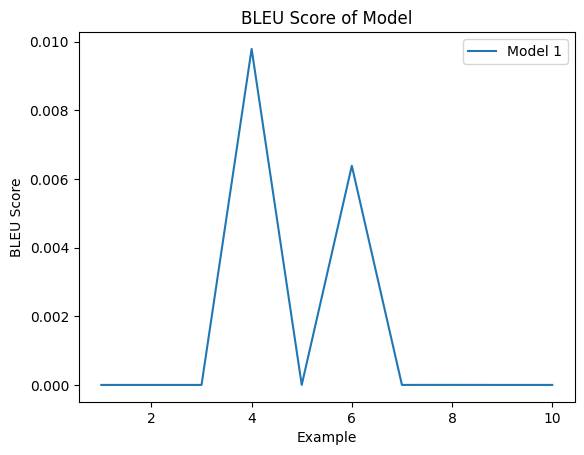

In [ ]:
import matplotlib.pyplot as plt

# ... (rest of the code remains the same)

# Create lists to store the BLEU scores
bleu_scores_model1 = []
bleu_scores_model2 = []

# Iterate through the dataset
for i in range(10):
  example = dataset['train'][i]
  context = example["mar_response"]
  question = example["mar_question"]

  # Perform question answering with both models
  result1 = qa_pipeline(question=question, context=context)
  answer1 = result1["answer"]

  result2 = other_qa_pipeline(question=question, context=context)
  answer2 = result2["answer"]

  # Calculate BLEU score for each answer against the reference question
  bleu_score1 = calculate_bleu_score(question, answer1)
  bleu_score2 = calculate_bleu_score(question, answer2)

  # Append the BLEU scores to the lists
  bleu_scores_model1.append(bleu_score1)
  bleu_scores_model2.append(bleu_score2)

  print('Example:', i + 1)
  print("Question:", question)
  print("Context:", context)
  print("Answer (Model 1):", answer1)
  print("BLEU Score (Model 1):", bleu_score1)
  print("Answer (Model 2):", answer2)
  print("BLEU Score (Model 2):", bleu_score2)
  print("----------------")

# Create a line graph of the BLEU scores
plt.plot(range(1, 11), bleu_scores_model1, label='Model 1')
#plt.plot(range(1, 11), bleu_scores_model2, label='Model 2')
plt.xlabel('Example')
plt.ylabel('BLEU Score')
plt.title('BLEU Score of Model')
plt.legend()
plt.show()

METHOD 2

In [ ]:
from transformers import BertForQuestionAnswering

model=BertForQuestionAnswering.from_pretrained('l3cube-pune/marathi-question-answering-squad-bert')

In [ ]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('l3cube-pune/marathi-question-answering-squad-bert')

In [ ]:
question = "या परिच्छेदात पुढे काय होते?"
answer_text = '''नंतर ती सुई शाईत बुडवते आणि पेन्सिलचा वापर करून तिच्या पायावर एक डिझाईन काढते, शेवटी चिंधीने घासते. या पर्यायामध्ये, ती सुई, पेन्सिल आणि धागा वापरण्याची प्रक्रिया सुरू ठेवत आहे, जी मागील वाक्यात ती काय करत होती याच्याशी सर्वात संबंधित आहे.
Answer: डिझाईन '''

In [ ]:
input_ids = tokenizer.encode(question,answer_text)

In [ ]:
print(input_ids)

[104, 1165, 142321, 1793, 4825, 8240, 1319, 138, 105, 5878, 2522, 65844, 178806, 1397, 90780, 110266, 2373, 1196, 46540, 108846, 1522, 5693, 2524, 13846, 7124, 2077, 1127, 148497, 152158, 1216, 119, 19067, 81243, 189614, 1216, 44440, 2373, 121, 1165, 28838, 5646, 119, 2522, 65844, 119, 46540, 108846, 1196, 100529, 5693, 12400, 4639, 3418, 124098, 1155, 119, 2254, 41995, 26957, 1793, 2522, 8240, 6465, 1470, 16199, 4039, 2395, 5399, 1155, 121, 59508, 133, 148497, 105]


In [ ]:
token_to_ids=tokenizer.convert_ids_to_tokens(input_ids)

In [ ]:
for token,id in zip(token_to_ids,input_ids):
  print(token,id)

[CLS] 104
या 1165
परिच्छेद 142321
##ात 1793
पुढे 4825
काय 8240
होते 1319
? 138
[SEP] 105
नंतर 5878
ती 2522
सुई 65844
शाई 178806
##त 1397
बु 90780
##डव 110266
##ते 2373
आणि 1196
पेन 46540
##्सिल 108846
##चा 1522
वापर 5693
करून 2524
तिच्या 13846
पाया 7124
##वर 2077
एक 1127
डिझाईन 148497
काढत 152158
##े 1216
, 119
शेवटी 19067
चिं 81243
##धीन 189614
##े 1216
घास 44440
##ते 2373
. 121
या 1165
पर्याय 28838
##ामध्ये 5646
, 119
ती 2522
सुई 65844
, 119
पेन 46540
##्सिल 108846
आणि 1196
धागा 100529
वापर 5693
##ण्याची 12400
प्रक्रिया 4639
सुरू 3418
ठेवत 124098
आहे 1155
, 119
जी 2254
मागील 41995
वाक्य 26957
##ात 1793
ती 2522
काय 8240
करत 6465
होती 1470
याच्या 16199
##शी 4039
सर्वात 2395
संबंधित 5399
आहे 1155
. 121
Answer 59508
: 133
डिझाईन 148497
[SEP] 105


In [ ]:
sep_index=input_ids.index(tokenizer.sep_token_id)
num_seg_a=sep_index+1
print(num_seg_a)
num_seg_b=len(input_ids)-num_seg_a
print(num_seg_b)
segment_ids=[0]*num_seg_a+[1]*num_seg_b
print(segment_ids)

9
65
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
!pip install torch
import torch

In [ ]:
outputs=model(torch.tensor([input_ids]),
              token_type_ids=torch.tensor([segment_ids]),
              return_dict=True)

In [ ]:
start_probs=outputs.start_logits
end_probs=outputs.end_logits

In [ ]:
print(start_probs)

tensor([[ 4.2531e+00, -4.6080e+00, -4.6401e+00, -4.9049e+00, -4.6781e+00,
         -4.6483e+00, -4.6755e+00, -4.8501e+00, -4.8536e+00,  1.1883e+00,
          1.7329e+00,  1.2372e+00,  5.7220e-01, -4.5060e+00, -4.6798e-01,
         -5.6450e+00, -3.8511e+00, -4.1308e-01, -2.7142e-01, -5.0799e+00,
         -4.8123e+00, -1.7011e+00, -1.0398e+00,  8.6694e-01,  8.2710e-02,
         -4.3395e+00,  4.7774e-01,  1.7603e+00, -1.8343e+00, -4.1876e+00,
         -3.2422e+00,  6.2474e-02,  8.6550e-01, -5.5639e+00, -4.6561e+00,
         -3.7969e-01, -4.5360e+00, -2.6990e+00,  1.5809e+00,  9.5427e-01,
         -1.7663e+00, -3.5392e+00,  4.9955e+00,  4.1131e+00, -2.0986e+00,
          1.6335e+00, -3.7222e+00,  1.2853e+00,  1.1535e+00,  1.9621e+00,
         -2.7007e+00,  2.2861e+00,  1.0085e+00, -3.8672e-02,  3.6270e-02,
         -1.9699e+00,  2.6847e-01,  2.5675e+00,  1.1835e+00, -3.5823e+00,
          3.8461e+00, -1.6713e-01, -4.0674e-03, -1.2018e+00,  9.2656e-01,
         -3.4610e+00,  2.8711e+00, -3.

In [ ]:
start_index=torch.argmax(start_probs)
end_index=torch.argmax(end_probs)
print(start_index)

tensor(42)


In [ ]:
answer=' '.join(token_to_ids[start_index:end_index+1])

In [ ]:
print(answer)

In [ ]:
answer=token_to_ids[start_index]
for i  in range(start_index+1,end_index+1):
  if token_to_ids[i][0:2]=='##':
    answer+=token_to_ids[i][2:]
  else:
    answer+=' '+token_to_ids[i]
print(answer)

ती


In [ ]:
labels=[]
for (ids,token) in enumerate(token_to_ids):
   labels.append('{:} - {:>2}'.format(token, ids))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

<ipython-input-48-bb6f7a9460e5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x=token_to_ids,y=s,ci=None)
<ipython-input-48-bb6f7a9460e5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font

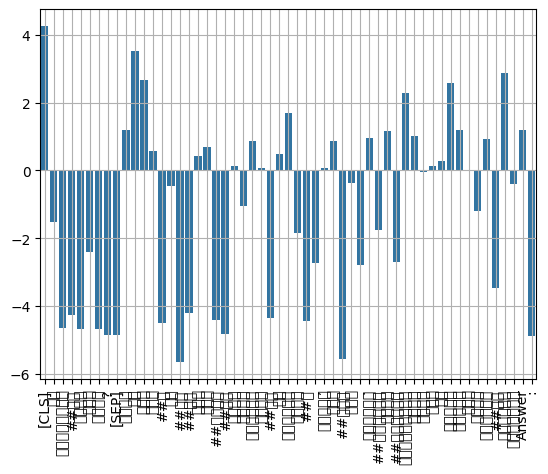

In [ ]:
s=start_probs.detach().numpy().flatten()
ax=sns.barplot(x=token_to_ids,y=s,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)